In [ ]:
!pip install pandas transformers torch scikit-learn tqdm -q

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from openai import OpenAI
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## For Swahili (Best)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import pandas as pd

def addNewFeatures(filePath, sample_size=10000, mask_context=True):
    df = pd.read_csv(filePath)
    df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

    # Models
    sbert = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    lm_name = "Jacaranda/UlizaLlama3"
    tokenizer = AutoTokenizer.from_pretrained(lm_name, trust_remote_code=True)
    lm_model = AutoModelForCausalLM.from_pretrained(lm_name, trust_remote_code=True).to(device)

    def get_embedding(text):
        return sbert.encode(text, convert_to_tensor=False)

    def compute_ppl(context, option):
        text = context + " " + option
        enc = tokenizer(text, return_tensors="pt").input_ids.to(device)

        if mask_context:
            ctx_len = tokenizer(context, return_tensors="pt").input_ids.size(-1)
            labels = enc.clone()
            labels[:, :ctx_len] = -100
        else:
            labels = enc.clone()

        with torch.no_grad():
            loss = lm_model(enc, labels=labels).loss
        return torch.exp(loss).item()

    # Initialize columns
    df["semantic_sim_A"] = df["semantic_sim_B"] = 0.0
    df["ppl_A"] = df["ppl_B"] = 0.0

    # Compute features
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        ctx, A, B = row["context"], row["option_A"], row["option_B"]

        # Semantic similarity
        ctx_emb = get_embedding(ctx)
        df.at[idx, "semantic_sim_A"] = cosine_similarity([ctx_emb], [get_embedding(A)])[0][0]
        df.at[idx, "semantic_sim_B"] = cosine_similarity([ctx_emb], [get_embedding(B)])[0][0]

        # Perplexity
        df.at[idx, "ppl_A"] = compute_ppl(ctx, A)
        df.at[idx, "ppl_B"] = compute_ppl(ctx, B)

    # Derived deltas
    df["delta_semantic_similarity"] = df["semantic_sim_A"] - df["semantic_sim_B"]
    df["delta_perplexity"] = df["ppl_B"] - df["ppl_A"]

    out_path = f"/content/drive/MyDrive/research-results-language/{filePath}_with_features_ppl_mask_{mask_context}_{lm_name.split('/')[-1]}.csv"
    df.to_csv(out_path, index=False)
    print("✅ Done! Saved:", out_path)

## For English (Best)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import pandas as pd

def addNewFeatures(filePath, sample_size=10000, mask_context=True):
    df = pd.read_csv(filePath)
    df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

    # Models
    sbert = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    lm_name = "mistralai/Mistral-7B-Instruct-v0.3"
    tokenizer = AutoTokenizer.from_pretrained(lm_name, trust_remote_code=True)
    lm_model = AutoModelForCausalLM.from_pretrained(lm_name, trust_remote_code=True).to(device)

    def get_embedding(text):
        return sbert.encode(text, convert_to_tensor=False)

    def compute_ppl(context, option):
        text = context + " " + option
        enc = tokenizer(text, return_tensors="pt").input_ids.to(device)

        if mask_context:
            ctx_len = tokenizer(context, return_tensors="pt").input_ids.size(-1)
            labels = enc.clone()
            labels[:, :ctx_len] = -100
        else:
            labels = enc.clone()

        with torch.no_grad():
            loss = lm_model(enc, labels=labels).loss
        return torch.exp(loss).item()

    # Initialize columns
    df["semantic_sim_A"] = df["semantic_sim_B"] = 0.0
    df["ppl_A"] = df["ppl_B"] = 0.0

    # Compute features
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        ctx, A, B = row["context"], row["option_A"], row["option_B"]

        # Semantic similarity
        ctx_emb = get_embedding(ctx)
        df.at[idx, "semantic_sim_A"] = cosine_similarity([ctx_emb], [get_embedding(A)])[0][0]
        df.at[idx, "semantic_sim_B"] = cosine_similarity([ctx_emb], [get_embedding(B)])[0][0]

        # Perplexity
        df.at[idx, "ppl_A"] = compute_ppl(ctx, A)
        df.at[idx, "ppl_B"] = compute_ppl(ctx, B)

    # Derived deltas
    df["delta_semantic_similarity"] = df["semantic_sim_A"] - df["semantic_sim_B"]
    df["delta_perplexity"] = df["ppl_B"] - df["ppl_A"]

    out_path = f"/content/drive/MyDrive/research-results-language/{filePath}_with_features_ppl_mask_{mask_context}_{lm_name.split('/')[-1]}.csv"
    df.to_csv(out_path, index=False)
    print("✅ Done! Saved:", out_path)

## For Hausa (Best)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import pandas as pd

def addNewFeatures(filePath, sample_size=10000, mask_context=False):
    df = pd.read_csv(filePath)
    df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

    # Models
    sbert = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    lm_name = "Jacaranda/HausaLlama"
    tokenizer = AutoTokenizer.from_pretrained(lm_name, trust_remote_code=True)
    lm_model = AutoModelForCausalLM.from_pretrained(lm_name, trust_remote_code=True).to(device)

    def get_embedding(text):
        return sbert.encode(text, convert_to_tensor=False)

    def compute_ppl(context, option):
        text = context + " " + option
        enc = tokenizer(text, return_tensors="pt").input_ids.to(device)

        if mask_context:
            ctx_len = tokenizer(context, return_tensors="pt").input_ids.size(-1)
            labels = enc.clone()
            labels[:, :ctx_len] = -100
        else:
            labels = enc.clone()

        with torch.no_grad():
            loss = lm_model(enc, labels=labels).loss
        return torch.exp(loss).item()

    # Initialize columns
    df["semantic_sim_A"] = df["semantic_sim_B"] = 0.0
    df["ppl_A"] = df["ppl_B"] = 0.0

    # Compute features
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        ctx, A, B = row["context"], row["option_A"], row["option_B"]

        # Semantic similarity
        ctx_emb = get_embedding(ctx)
        df.at[idx, "semantic_sim_A"] = cosine_similarity([ctx_emb], [get_embedding(A)])[0][0]
        df.at[idx, "semantic_sim_B"] = cosine_similarity([ctx_emb], [get_embedding(B)])[0][0]

        # Perplexity
        df.at[idx, "ppl_A"] = compute_ppl(ctx, A)
        df.at[idx, "ppl_B"] = compute_ppl(ctx, B)

    # Derived deltas
    df["delta_semantic_similarity"] = df["semantic_sim_A"] - df["semantic_sim_B"]
    df["delta_perplexity"] = df["ppl_B"] - df["ppl_A"]

    out_path = f"/content/drive/MyDrive/research-results-language/{filePath}_with_features_ppl_mask_{mask_context}_{lm_name.split('/')[-1]}.csv"
    df.to_csv(out_path, index=False)
    print("✅ Done! Saved:", out_path)

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
!huggingface-cli login --token [HUGGING_FACE_TOKEN]

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `newFeatures` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `newFeatures`


## Data Validation

1. Distractor Option Perplexity vs Distance
2. Distractor Option Similarity vs Distance
3. Perplexity vs Context Length
4. Similarity vs Context Length

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data_path, title):
    df = pd.read_csv(data_path)

    # Precomputations
    df["true_ppl"] = df.apply(lambda r: r["ppl_A"] if r["label"] == "A" else r["ppl_B"], axis=1)
    df["distractor_ppl"] = df.apply(lambda r: r["ppl_B"] if r["label"] == "A" else r["ppl_A"], axis=1)
    df["semantic_sim_distractor"] = df.apply(lambda r: r["semantic_sim_B"] if r["label"] == "A" else r["semantic_sim_A"], axis=1)
    df["true_sim"] = df.apply(lambda r: r["semantic_sim_A"] if r["label"] == "A" else r["semantic_sim_B"], axis=1)
    df["distractor_sim"] = df.apply(lambda r: r["semantic_sim_B"] if r["label"] == "A" else r["semantic_sim_A"], axis=1)

    fig, axes = plt.subplots(1, 4, figsize=(24, 5))
    fig.suptitle(title, fontsize=16)

    # Plot 1: Mean Distractor Perplexity by Distance (red)
    filtered = df[df["distractor_ppl"] < df["distractor_ppl"].quantile(0.99)]
    mean_ppl = filtered.groupby("distractor_distance")["distractor_ppl"].mean()
    axes[0].plot(mean_ppl.index, mean_ppl.values, marker="o", color="red")
    axes[0].set_title("Distractor Option Perplexity vs Distance")
    axes[0].set_xlabel("Distractor Distance")
    axes[0].set_ylabel("Mean Perplexity")
    axes[0].grid(True)

    # Plot 2: Mean Semantic Similarity of Distractor by Distance (red)
    mean_sim = df.groupby("distractor_distance")["semantic_sim_distractor"].mean()
    axes[1].plot(mean_sim.index, mean_sim.values, marker="o", color="red")
    axes[1].set_title("Distractor Option Similarity vs Distance")
    axes[1].set_xlabel("Distractor Distance")
    axes[1].set_ylabel("Mean Semantic Similarity")
    axes[1].grid(True)

    # Plot 3: Perplexity by Context Length
    ppl_cutoff = max(df["true_ppl"].quantile(0.99), df["distractor_ppl"].quantile(0.99))
    filtered = df[(df["true_ppl"] < ppl_cutoff) & (df["distractor_ppl"] < ppl_cutoff)]
    mean_true = filtered.groupby("context_length")["true_ppl"].mean()
    mean_dist = filtered.groupby("context_length")["distractor_ppl"].mean()
    axes[2].plot(mean_true.index, mean_true.values, marker="o", color="green", label="True Option")
    axes[2].plot(mean_dist.index, mean_dist.values, marker="s", color="red", label="Distractor")
    axes[2].set_title("Perplexity vs Context Length")
    axes[2].set_xlabel("Context Length")
    axes[2].set_ylabel("Mean Perplexity")
    axes[2].legend()
    axes[2].grid(True)

    # Plot 4: Semantic Similarity by Context Length
    sim_cutoff = max(df["true_sim"].quantile(0.99), df["distractor_sim"].quantile(0.99))
    filtered = df[(df["true_sim"] < sim_cutoff) & (df["distractor_sim"] < sim_cutoff)]
    mean_true_sim = filtered.groupby("context_length")["true_sim"].mean()
    mean_dist_sim = filtered.groupby("context_length")["distractor_sim"].mean()
    axes[3].plot(mean_true_sim.index, mean_true_sim.values, marker="o", color="green", label="True Option")
    axes[3].plot(mean_dist_sim.index, mean_dist_sim.values, marker="s", color="red", label="Distractor")
    axes[3].set_title("Similarity vs Context Length")
    axes[3].set_xlabel("Context Length")
    axes[3].set_ylabel("Mean Semantic Similarity")
    axes[3].legend()
    axes[3].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"{title.replace(' ', '_').lower()}_plot.png", dpi=300, bbox_inches='tight')
    plt.show()

1. Distractor Option Perplexity vs Distance
2. Distractor Option Similarity vs Distance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data_path, title):
    df = pd.read_csv(data_path)

    # Compute metrics based on ground truth label
    df["true_ppl"] = df.apply(lambda r: r["ppl_A"] if r["label"] == "A" else r["ppl_B"], axis=1)
    df["distractor_ppl"] = df.apply(lambda r: r["ppl_B"] if r["label"] == "A" else r["ppl_A"], axis=1)
    df["semantic_sim_distractor"] = df.apply(lambda r: r["semantic_sim_B"] if r["label"] == "A" else r["semantic_sim_A"], axis=1)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(title, fontsize=16)

    # Plot 1: Mean Distractor Perplexity by Distance
    filtered = df[df["distractor_ppl"] < df["distractor_ppl"].quantile(0.99)]
    mean_ppl = filtered.groupby("distractor_distance")["distractor_ppl"].mean()
    axes[0].plot(mean_ppl.index, mean_ppl.values, marker="o")
    axes[0].set_title("Distractor Option Perplexity vs Distance")
    axes[0].set_xlabel("Distractor Distance")
    axes[0].set_ylabel("Mean Perplexity")
    axes[0].grid(True)

    # Plot 2: Mean Semantic Similarity of Distractor by Distance
    mean_sim = df.groupby("distractor_distance")["semantic_sim_distractor"].mean()
    axes[1].plot(mean_sim.index, mean_sim.values, marker="o", color="red")
    axes[1].set_title("Distractor Option Similarity vs Distance")
    axes[1].set_xlabel("Distractor Distance")
    axes[1].set_ylabel("Mean Semantic Similarity")
    axes[1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"{title.replace(' ', '_').lower()}_plot.png", dpi=300, bbox_inches='tight')
    plt.show()


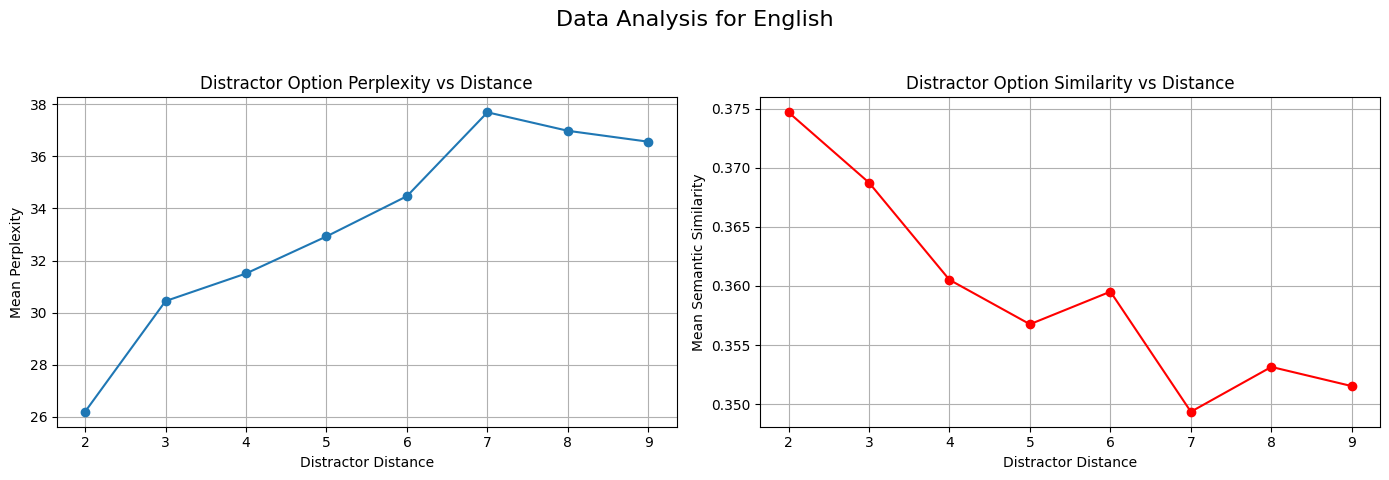

In [ ]:
plot_data('/content/drive/MyDrive/research-results-language/nsp_questions_en_filtered.csv_with_features_ppl_mask_True_Mistral-7B-Instruct-v0.3.csv', 'Data Analysis for English')

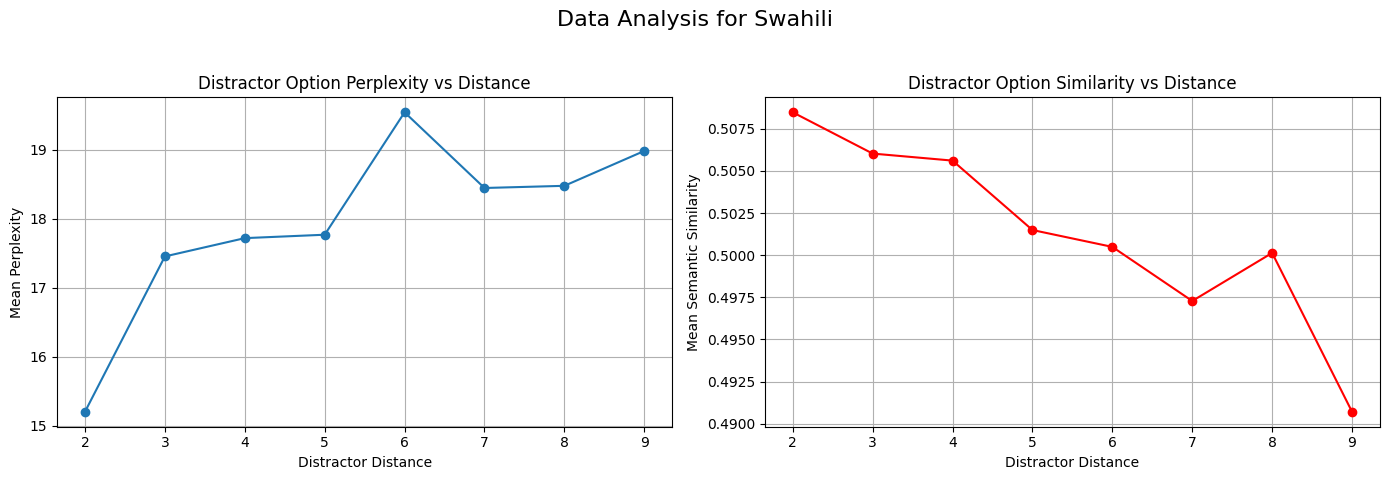

In [ ]:
plot_data('/content/drive/MyDrive/research-results-language/nsp_questions_sw.csv_with_features_ppl_mask_True_UlizaLlama3.csv', 'Data Analysis for Swahili')

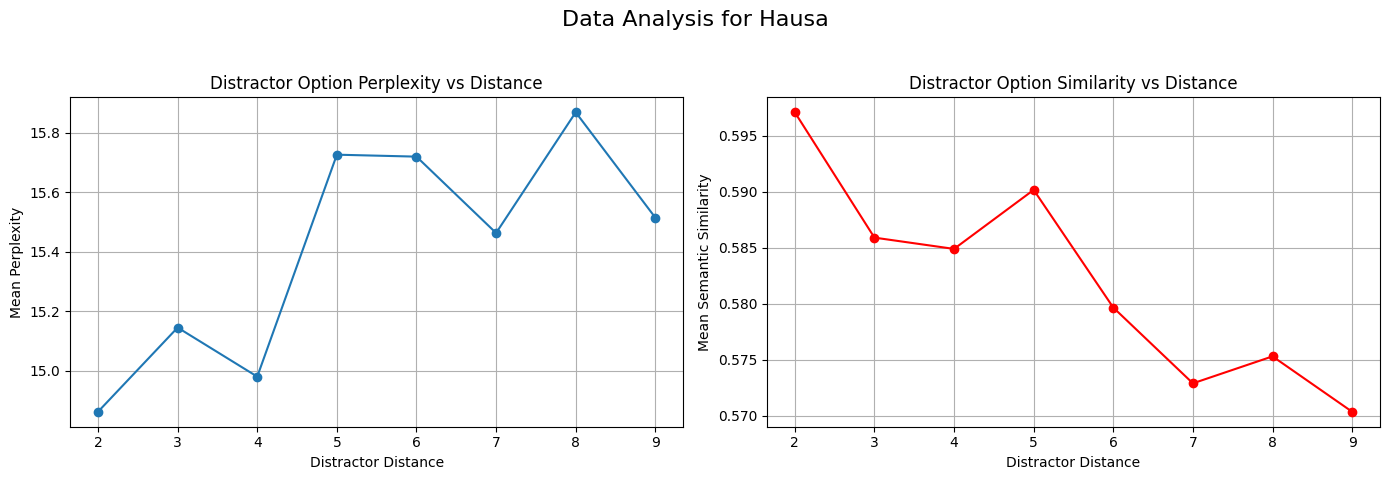

In [ ]:
plot_data('/content/drive/MyDrive/research-results-language/nsp_questions_ha_filtered.csv_with_features_ppl_mask_False_HausaLlama.csv', 'Data Analysis for Hausa')

## Error Analysis

In [ ]:
import pandas as pd

def save_wrong_answers_by_model(csv_path):
    df = pd.read_csv(csv_path)

    # Ensure consistent formatting
    df['label'] = df['label'].astype(str).str.strip().str.upper()
    df['gpt_answer'] = df['gpt_answer'].astype(str).str.strip().str.upper()
    df['gemini_answer'] = df['gemini_answer'].astype(str).str.strip().str.upper()
    df['llama_answer'] = df['llama_answer'].astype(str).str.strip().str.upper()

    # Filter wrong answers
    gpt_wrong = df[df['gpt_answer'] != df['label']]
    gemini_wrong = df[df['gemini_answer'] != df['label']]
    llama_wrong = df[df['llama_answer'] != df['label']]

    # Save to separate files
    gpt_wrong.to_csv('gpt_wrong_answers.csv', index=False)
    gemini_wrong.to_csv('gemini_wrong_answers.csv', index=False)
    llama_wrong.to_csv('llama_wrong_answers.csv', index=False)

    print(f"✅ GPT wrong: {len(gpt_wrong)}, Gemini wrong: {len(gemini_wrong)}, LLaMA wrong: {len(llama_wrong)}")

# Usage
save_wrong_answers_by_model('NSP_QUESTIONS_WITH_ANSWERS_EN.csv')  # Replace with your actual file name

✅ GPT wrong: 1839, Gemini wrong: 1921, LLaMA wrong: 1929


/tmp/ipython-input-11-3677300586.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(feature).apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)
/tmp/ipython-input-11-3677300586.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(feature).apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)
/tmp/ipython-input-11-3677300586.py:9: Depreca

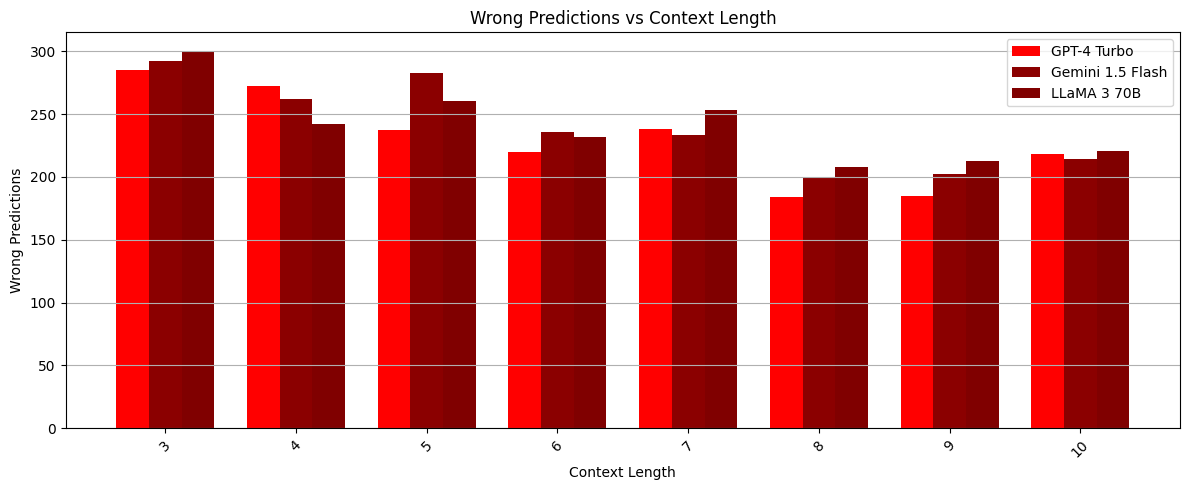

/tmp/ipython-input-11-3677300586.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(feature).apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)
/tmp/ipython-input-11-3677300586.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(feature).apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)
/tmp/ipython-input-11-3677300586.py:9: Depreca

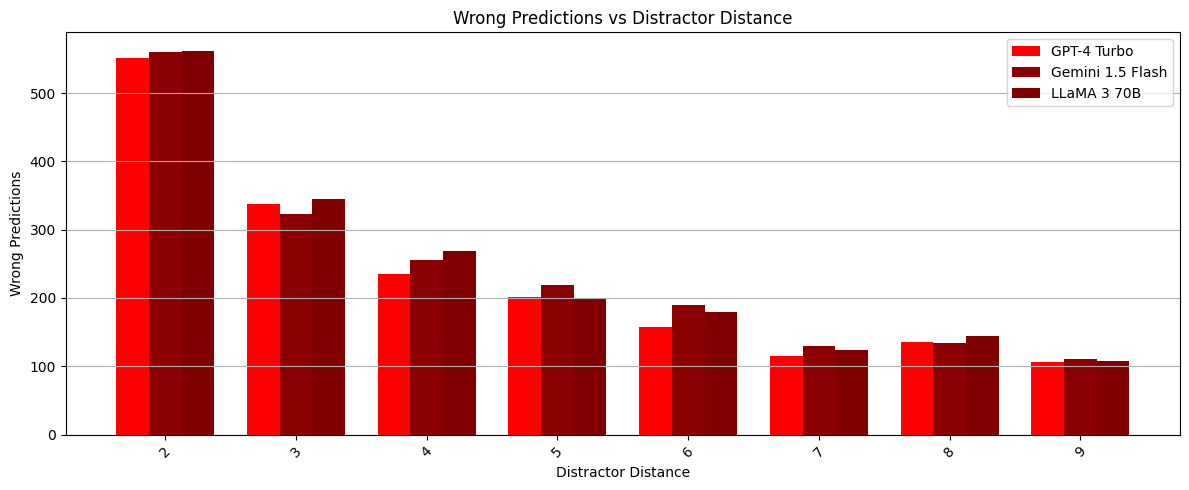

/tmp/ipython-input-11-3677300586.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('bin').apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)
/tmp/ipython-input-11-3677300586.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('bin').apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)
/tmp/ipython-input-11-3677300586.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

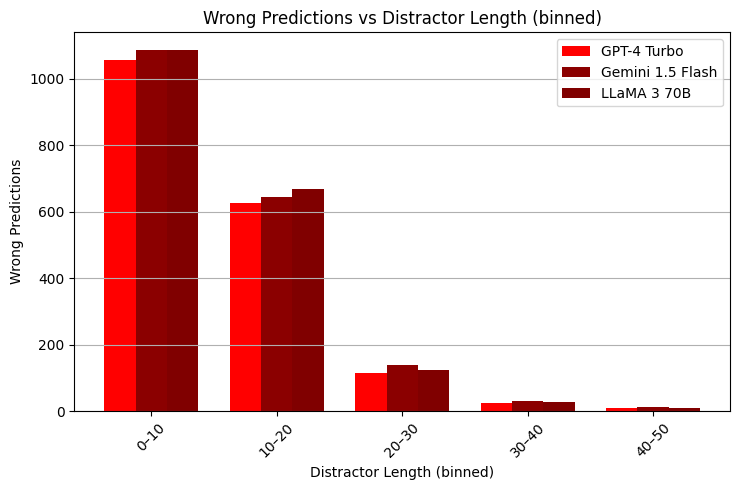

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(csv_path):
    return pd.read_csv(csv_path)

def count_errors_discrete(df, feature, model_col):
    return df.groupby(feature).apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)

def count_errors_binned_clean(df, feature, model_col, bins):
    bin_labels = [f"{int(bins[i])}–{int(bins[i+1])}" for i in range(len(bins)-1)]
    df['bin'] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True)
    return df.groupby('bin').apply(lambda g: (g[model_col] != g['label']).sum()).rename(model_col)

def plot_grouped_errors(error_df, title, xlabel):
    x = np.arange(len(error_df.index))  # label positions
    width = 0.25

    plt.figure(figsize=(max(6, len(x) * 1.5), 5))
    plt.bar(x - width, error_df['gpt_answer'], width=width, label='GPT-4 Turbo', color='red')
    plt.bar(x, error_df['gemini_answer'], width=width, label='Gemini 1.5 Flash', color='darkred')
    plt.bar(x + width, error_df['llama_answer'], width=width, label='LLaMA 3 70B', color='maroon')

    plt.xlabel(xlabel)
    plt.ylabel("Wrong Predictions")
    plt.title(title)
    plt.xticks(x, error_df.index, rotation=45)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main(csv_path):
    df = load_data(csv_path)
    length_bins = [0, 10, 20, 30, 40, 50]

    features = [
        ('context_length', False, None, "Context Length"),
        ('distractor_distance', False, None, "Distractor Distance"),
        ('distractor_length', True, length_bins, "Distractor Length (binned)")
    ]

    model_cols = ['gpt_answer', 'gemini_answer', 'llama_answer']

    for feature, is_binned, bins, xlabel in features:
        error_dict = {}
        for model_col in model_cols:
            if is_binned:
                err = count_errors_binned_clean(df.copy(), feature, model_col, bins)
            else:
                err = count_errors_discrete(df, feature, model_col)
            error_dict[model_col] = err

        # Combine all model errors for this feature into one DataFrame
        combined = pd.concat(error_dict.values(), axis=1)
        combined.columns = model_cols

        # Plot grouped bar chart
        plot_grouped_errors(combined, f"Wrong Predictions vs {xlabel}", xlabel)

# Replace with your file
main("/content/NSP_QUESTIONS_WITH_ANSWERS_EN.csv")

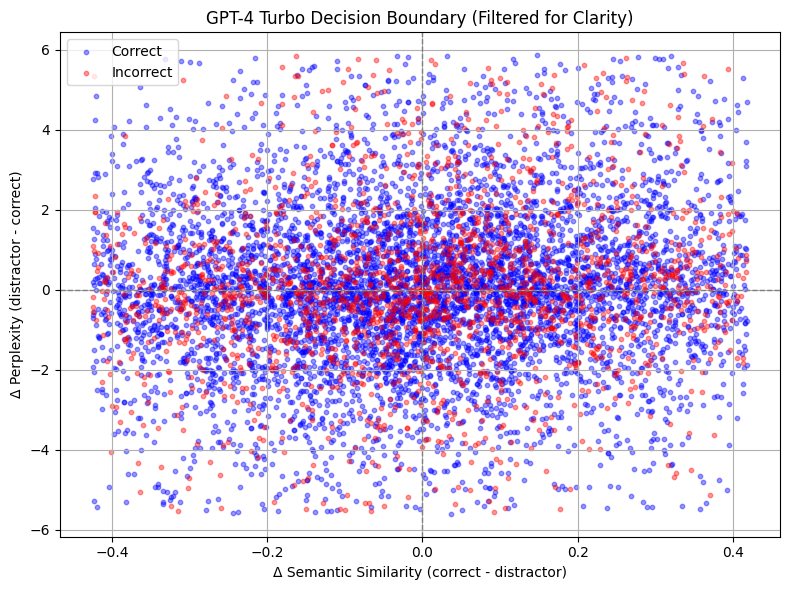

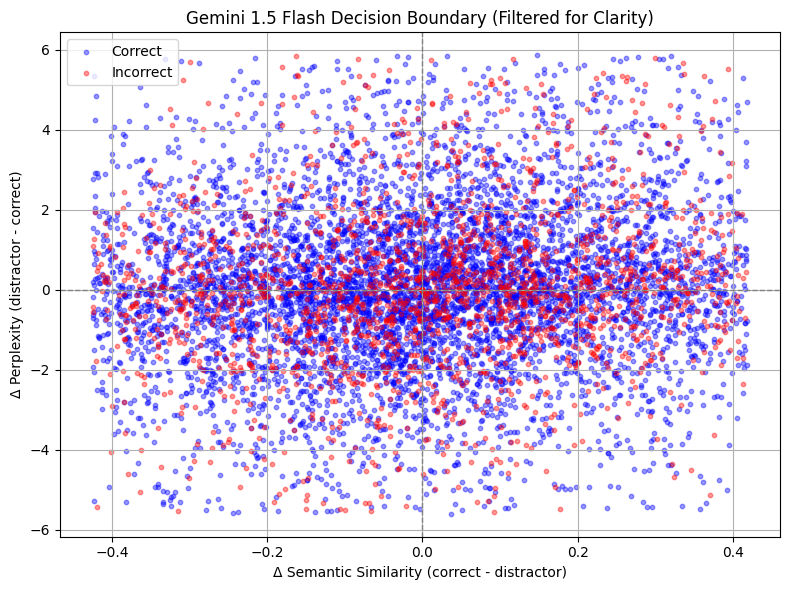

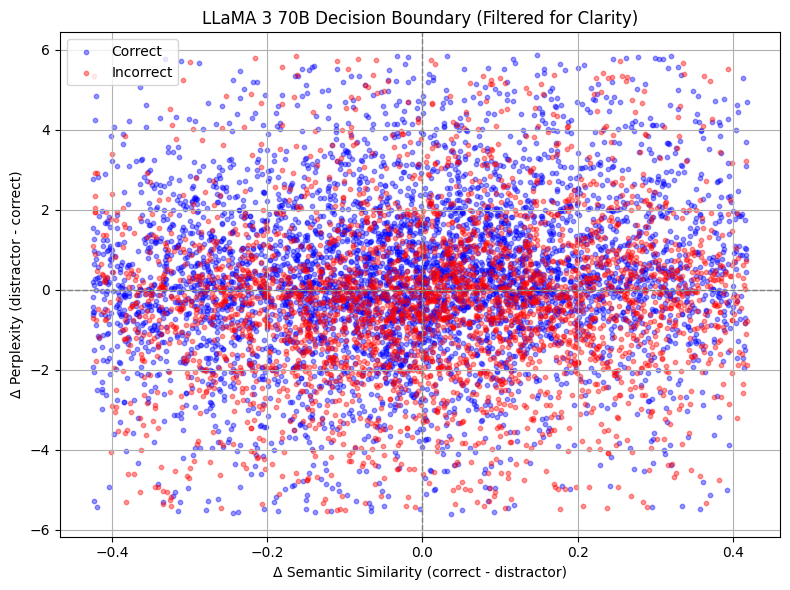

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers(df, x_col, y_col, lower_percentile=5, upper_percentile=95):
    x_low, x_high = df[x_col].quantile([lower_percentile/100, upper_percentile/100])
    y_low, y_high = df[y_col].quantile([lower_percentile/100, upper_percentile/100])
    return df[(df[x_col] >= x_low) & (df[x_col] <= x_high) &
              (df[y_col] >= y_low) & (df[y_col] <= y_high)]

def plot_decision_boundary(df, model_col, model_name, language_filter=None):
    if language_filter:
        df = df[df['language'] == language_filter]

    # Compute correctness
    df['is_correct'] = (df[model_col] == df['label'])

    # Filter out outliers for clearer visualization
    df = remove_outliers(df, 'delta_semantic_similarity', 'delta_perplexity')

    # Prepare plot
    plt.figure(figsize=(8, 6))
    correct = df[df['is_correct']]
    incorrect = df[~df['is_correct']]

    # Scatter plot
    plt.scatter(
        correct['delta_semantic_similarity'], correct['delta_perplexity'],
        color='blue', alpha=0.4, label='Correct', s=10
    )
    plt.scatter(
        incorrect['delta_semantic_similarity'], incorrect['delta_perplexity'],
        color='red', alpha=0.4, label='Incorrect', s=10
    )

    # Decorations
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f"{model_name} Decision Boundary (Filtered for Clarity)")
    plt.xlabel("Δ Semantic Similarity (correct - distractor)")
    plt.ylabel("Δ Perplexity (distractor - correct)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main(csv_path):
    df = pd.read_csv(csv_path)

    models = [
        ('gpt_answer', 'GPT-4 Turbo'),
        ('gemini_answer', 'Gemini 1.5 Flash'),
        ('llama_answer', 'LLaMA 3 70B')
    ]

    for model_col, model_name in models:
        plot_decision_boundary(df, model_col, model_name)

# Replace this with your CSV path
main("/content/NSP_QUESTIONS_WITH_ANSWERS_HA.csv")

/tmp/ipython-input-7-251497801.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  errors = df[df['is_wrong']].groupby('bin').size().reindex(labels, fill_value=0)


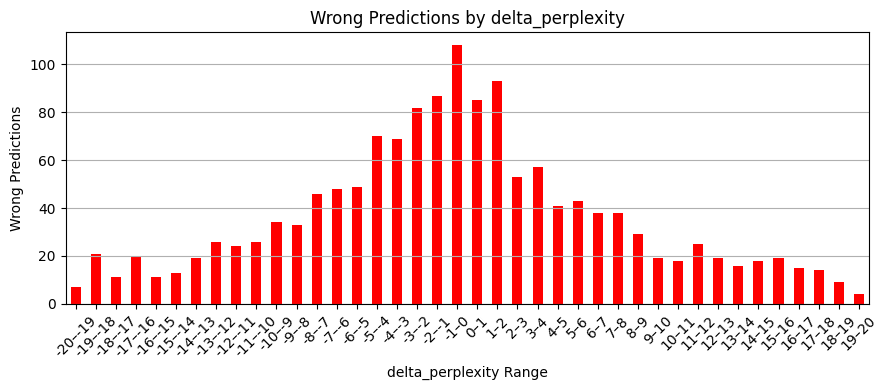

/tmp/ipython-input-7-251497801.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  errors = df[df['is_wrong']].groupby('bin').size().reindex(labels, fill_value=0)


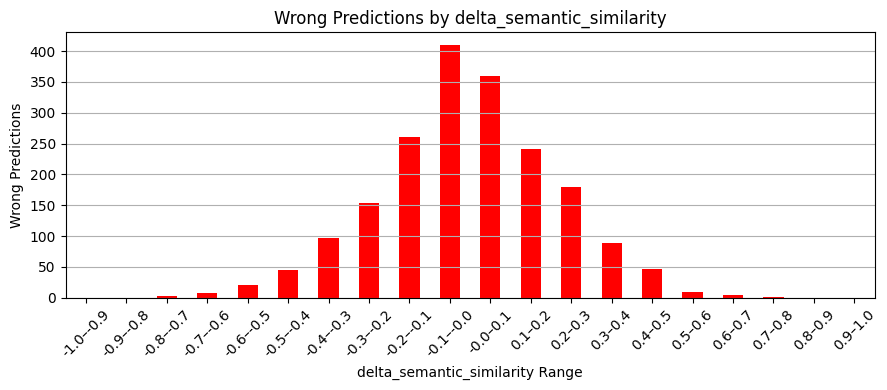

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_error_counts_by_range(df, model_col, metric, bin_width, range_min, range_max):
    df['is_wrong'] = df[model_col] != df['label']

    # Create bins and labels
    bins = np.arange(range_min, range_max + bin_width, bin_width)
    labels = [f"{round(b, 2)}–{round(b + bin_width, 2)}" for b in bins[:-1]]
    df['bin'] = pd.cut(df[metric], bins=bins, labels=labels, include_lowest=True)

    # Count wrongs in each bin
    errors = df[df['is_wrong']].groupby('bin').size().reindex(labels, fill_value=0)

    # Plot
    plt.figure(figsize=(9, 4))
    errors.plot(kind='bar', color='red')
    plt.title(f"Wrong Predictions by {metric}")
    plt.xlabel(f"{metric} Range")
    plt.ylabel("Wrong Predictions")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example usage
df = pd.read_csv("/content/NSP_QUESTIONS_WITH_ANSWERS_EN.csv")

# For delta_perplexity (assume range -10 to 10)
plot_error_counts_by_range(df, model_col='llama_answer', metric='delta_perplexity', bin_width=1, range_min=-20, range_max=20)

# For delta_semantic_similarity (range -1 to 1)
plot_error_counts_by_range(df, model_col='llama_answer', metric='delta_semantic_similarity', bin_width=0.1, range_min=-1, range_max=1)

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/wrong_answers.csv")  # Replace with your actual file name

# Step 1: Filter by delta_semantic_similarity near 0
df_filtered = df[(df['delta_semantic_similarity'] >= -0.05) & (df['delta_semantic_similarity'] <= 0.05)]

# Step 2: Keep only rows where all models got it wrong
wrong_all = df_filtered[
    (df_filtered['gpt_answer'] != df_filtered['label']) &
    (df_filtered['gemini_answer'] != df_filtered['label']) &
    (df_filtered['llama_answer'] != df_filtered['label'])
]

# Save to CSV
wrong_all.to_csv("filtered_similarity_zone_errors.csv", index=False)

print(f"✅ Saved {len(wrong_all)} rows to 'filtered_similarity_zone_errors.csv'")

✅ Saved 618 rows to 'filtered_similarity_zone_errors.csv'


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/wrong_answers.csv")  # Replace with your actual file name

# Apply all three filters:
# 1. context_length ≤ 3
# 2. distractor_distance ≥ 8
# 3. all three models got it wrong
filtered_df = df[
    (df['context_length'] <= 3) &
    (df['distractor_distance'] >= 8) &
    (df['gpt_answer'] != df['label']) &
    (df['gemini_answer'] != df['label']) &
    (df['llama_answer'] != df['label'])
]

# Save the filtered rows to a new CSV
filtered_df.to_csv("filtered_context3_dist8_all_wrong.csv", index=False)

print(f"✅ Saved {len(filtered_df)} rows to 'filtered_context3_dist8_all_wrong.csv'")

✅ Saved 48 rows to 'filtered_context3_dist8_all_wrong.csv'


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/NSP_QUESTIONS_WITH_ANSWERS_1000_HA - FINAL.csv")  # Replace with your actual file name

# Apply combined filters
filtered_df = df[
    (df['gpt_answer_COT'] == df['label']) &
    (df['gemini_answer_COT'] == df['label']) &
    (df['llama_answer_COT'] != df['label']) &
    (df['distractor_distance'] >= 8) &
    (df['context_length'] >= 5)
]

# Save to new CSV
filtered_df.to_csv("gpt_gemini_correct_llama_wrong_filtered.csv", index=False)

print(f"✅ Saved {len(filtered_df)} rows to 'gpt_gemini_correct_llama_wrong_filtered.csv'")

✅ Saved 16 rows to 'gpt_gemini_correct_llama_wrong_filtered.csv'


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cot_confusion_matrix(df, base_col, cot_col, model_name="Model"):
    # Determine correctness
    base_correct = df[base_col] == df['label']
    cot_correct = df[cot_col] == df['label']

    # Build 2x2 matrix
    matrix = pd.crosstab(base_correct, cot_correct)
    matrix = matrix.reindex(index=[True, False], columns=[True, False], fill_value=0)
    matrix.index = ['Baseline Correct', 'Baseline Incorrect']
    matrix.columns = ['CoT Correct', 'CoT Incorrect']

    # Plot heatmap with corrected color logic
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        matrix,
        annot=True,
        fmt='d',
        cmap="YlGn",  # ✅ Green = better, lighter = lower
        linewidths=1,
        cbar=True,
        cbar_kws={'label': 'Sample Count'}
    )
    plt.title(f"CoT Confusion Matrix for {model_name}")
    plt.tight_layout()
    plt.show()

    return matrix

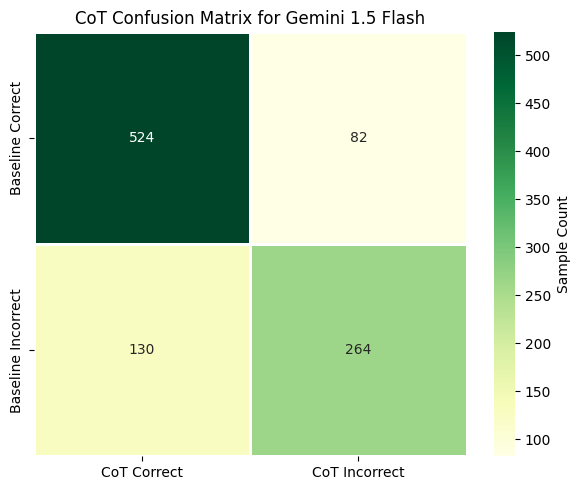

In [ ]:
df = pd.read_csv("/content/NSP_QUESTIONS_WITH_ANSWERS_1000_HA - FINAL.csv")

# For Gemini in Swahili (just an example)
cot_matrix = plot_cot_confusion_matrix(
    df,
    base_col='llama_answer',
    cot_col='llama_answer_COT',
    model_name="Gemini 1.5 Flash"
)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_cot_confusion_matrix(df, base_col, cot_col):
    base_correct = df[base_col] == df['label']
    cot_correct = df[cot_col] == df['label']

    matrix = pd.crosstab(base_correct, cot_correct)
    matrix = matrix.reindex(index=[True, False], columns=[True, False], fill_value=0)
    matrix.index = ['Baseline Correct', 'Baseline Incorrect']
    matrix.columns = ['CoT Correct', 'CoT Incorrect']
    return matrix

def plot_all_model_matrices(df):
    models = [
        ("gpt_answer", "gpt_answer_COT", "GPT-4 Turbo"),
        ("gemini_answer", "gemini_answer_COT", "Gemini 1.5 Flash"),
        ("llama_answer", "llama_answer_COT", "LLaMA 3 70B"),
    ]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Determine common vmin/vmax for color scale
    all_counts = []
    for base, cot, _ in models:
        m = generate_cot_confusion_matrix(df, base, cot)
        all_counts.extend(m.values.flatten())
    vmin = min(all_counts)
    vmax = max(all_counts)

    for i, (base_col, cot_col, model_name) in enumerate(models):
        matrix = generate_cot_confusion_matrix(df, base_col, cot_col)
        sns.heatmap(
            matrix,
            annot=True,
            fmt='d',
            cmap="YlGn",  # 🟩 green = good, 🟥 red = bad
            linewidths=1,
            cbar=(i == 2),  # Show colorbar only on the last plot
            cbar_kws={'label': 'Sample Count'} if i == 2 else None,
            vmin=vmin,
            vmax=vmax,
            ax=axes[i]
        )
        axes[i].set_title(f"{model_name}")
        axes[i].set_xlabel("CoT Prediction")
        axes[i].set_ylabel("Baseline Prediction")
        axes[i].set_xticklabels(matrix.columns, rotation=0)
        axes[i].set_yticklabels(matrix.index, rotation=0)

    plt.suptitle("Chain-of-Thought Confusion Matrices", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

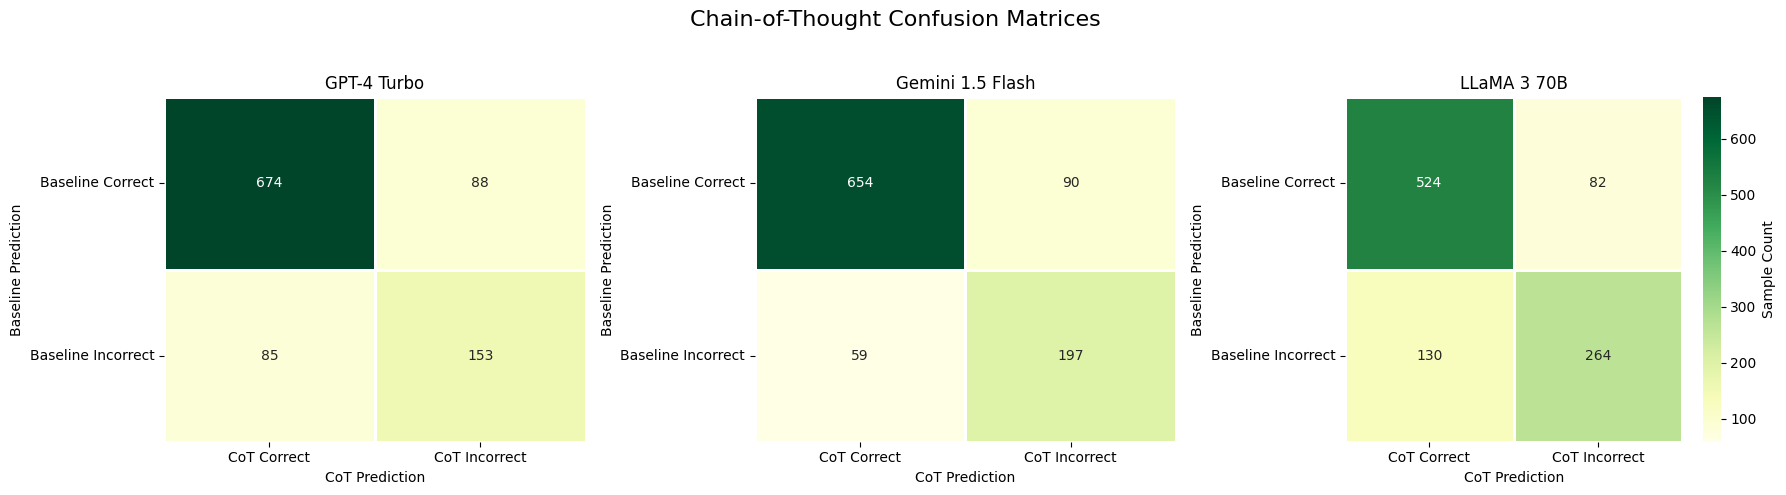

In [ ]:
df = pd.read_csv("/content/NSP_QUESTIONS_WITH_ANSWERS_1000_HA - FINAL.csv")
plot_all_model_matrices(df)

In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/NSP_QUESTIONS_WITH_ANSWERS_1000_HA - FINAL.csv")  # 👈 replace with your filename

# Filter: Gemini correct, but Gemini CoT wrong
filtered = df[
    (df['gemini_answer'] == df['label']) &
    (df['gemini_answer_COT'] != df['label']) &
    (df['gpt_answer'] == df['label']) &
    (df['gpt_answer_COT'] != df['label'])
]

# Save to CSV
filtered.to_csv("gemini_correct_cot_wrong.csv", index=False)

print(f"✅ Saved {len(filtered)} rows to 'gemini_correct_cot_wrong.csv'")

✅ Saved 19 rows to 'gemini_correct_cot_wrong.csv'


In [ ]:
import pandas as pd

# List all headers explicitly
HEADERS = [
    "story_id", "story_length", "context", "context_length",
    "distractor_distance", "distractor_length", "option_A", "option_B",
    "label", "semantic_sim_A", "semantic_sim_B", "ppl_A", "ppl_B",
    "delta_semantic_similarity", "delta_perplexity",
    "gpt_answer", "gemini_answer", "llama_answer",
    "gpt_answer_COT", "gpt_reasoning_COT",
    "gemini_answer_COT", "gemini_reasoning_COT",
    "llama_answer_COT", "llama_reasoning_COT"
]

def print_examples(csv_path, target_id):
    # Load the CSV
    df = pd.read_csv(csv_path)

    # Make sure types align (e.g. story_id might be numeric)
    # Convert both to string for comparison if needed:
    df['story_id'] = df['story_id'].astype(str)
    target_id = str(target_id)

    # Filter for only rows matching the target
    subset = df[df['story_id'] == target_id]

    for idx, row in subset.iterrows():
        print(f"=== Example (row {idx}) ===")
        for h in HEADERS:
            # Use row.get for safety; if missing, returns None
            val = row.get(h, None)
            print(f"{h}: {val}")
        print()

if __name__ == "__main__":
    # Replace with the CSV you actually want to inspect,
    # and the story_id you care about (e.g. 72).
    print_examples(
        "/content/NSP_QUESTIONS_WITH_ANSWERS_HA_1000_COT.csv",
        target_id=68
    )

=== Example (row 19) ===
story_id: 68
story_length: 72
context: Wata rana, ƙato ya yi tunani ya ce: "Ina iya sauya muryata don ta zama kamar ta ma'aifiyar Fati." Sai ya fura wuta da yawa kuma saka dutsi mai sulɓi cikin wutar. Bayan dutsin ya yi zafi, sai ya fiddo shi ya hadiye shi! "Gulugulu!" Dutsin ya wuce ta maƙogoron ƙaton. Ƙato ya fara waƙa don ya ji in muryarshi ta sake. Ya yi ta jin daɗi ya ji muryar tashi ta yi kama da ta ma'aifiayar Fati! Washe gari, ƙato ya je bakin ƙofar Fati. Ya fara waƙar kamar haka: Fati ɗiyata! Fati ɗiyata!
context_length: 8
distractor_distance: 4
distractor_length: 11
option_A: Sai ta so ta rufe ƙofar amma ƙato ya fi ƙarfinta!
option_B: Fito maza ga abincinki!
label: B
semantic_sim_A: 0.55444175
semantic_sim_B: 0.4083841443
ppl_A: 9.782460213
ppl_B: 11.1832304
delta_semantic_similarity: 0.1460576057
delta_perplexity: 1.400770187
gpt_answer: B
gemini_answer: A
llama_answer: A
gpt_answer_COT: A
gpt_reasoning_COT: To determine the most logical continuation

In [ ]:
import pandas as pd

def add_correct_flags(input_csv, output_csv):
    """
    Reads the input CSV, adds 0/1 flags for each model's direct answer correctness,
    and saves the updated DataFrame to a new CSV.
    """
    # Load the CSV
    df = pd.read_csv(input_csv)

    # For each model, compare its direct answer to the label and assign 1 (correct) or 0 (wrong)
    df['gpt_correct']    = (df['gpt_answer']    == df['label']).astype(int)
    df['gemini_correct'] = (df['gemini_answer'] == df['label']).astype(int)
    df['llama_correct']  = (df['llama_answer']  == df['label']).astype(int)

    # Save the updated DataFrame
    df.to_csv(output_csv, index=False)
    print(f"Saved updated file with correctness flags to: {output_csv}")

if __name__ == "__main__":
    # Replace with your actual file paths
    add_correct_flags(
        input_csv="/content/NSP_QUESTIONS_WITH_ANSWERS_HA.csv",
        output_csv="with_correct_flags_HA.csv"
    )

Saved updated file with correctness flags to: with_correct_flags_HA.csv


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

def analyze_influential_factors(file_path):
    """
    Loads data, splits it 80/20, trains three logistic regression models,
    and identifies the most influential factor for each based on the training data.

    Args:
        file_path (str): The full path to the input CSV file.
    """
    # --- 1. Data Loading and Preparation ---
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded data from '{file_path}'.\n")
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        print("Please make sure you provide the correct path to your data file.")
        return
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return

    # Define the predictor variables (features) for the models.
    features = [
        'story_length',
        'context_length',
        'distractor_distance',
        'distractor_length',
        'delta_semantic_similarity',
        'delta_perplexity'
    ]

    # Define the target variables. We will build a separate model for each.
    targets = [
        'gpt_correct',
        'gemini_correct',
        'llama_correct'
    ]

    # Basic data validation
    for col in features + targets:
        if col not in df.columns:
            print(f"Error: Required column '{col}' not found in the CSV file.")
            return

    df.dropna(subset=features + targets, inplace=True)

    # --- 2. Model Training and Analysis Loop ---
    for target_model in targets:
        print(f"--- Analysis for: {target_model} ---")

        X = df[features]
        y = df[target_model]

        # Split the data into 80% training and 20% testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42, stratify=y
        )

        # Scale features. Fit ONLY on the training data to prevent data leakage.
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test) # Use the same scaler for the test set

        # Initialize and train the Logistic Regression model on the training data
        log_reg_model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
        log_reg_model.fit(X_train_scaled, y_train)

        # --- 3. Identify the Most Influential Factor from the Trained Model ---
        coefficients = log_reg_model.coef_[0]
        absolute_coeffs = np.abs(coefficients)
        most_influential_idx = np.argmax(absolute_coeffs)
        most_influential_feature = features[most_influential_idx]
        influence_value = coefficients[most_influential_idx]

        print(f"The most influential factor (from 80% training data) is: '{most_influential_feature}'")
        print(f"Coefficient value: {influence_value:.4f}")
        if influence_value > 0:
            print("Interpretation: As this factor increases, the model is MORE likely to be correct.")
        else:
            print("Interpretation: As this factor increases, the model is LESS likely to be correct.")

        # --- 4. Validate Model Performance on the 20% Test Set ---
        y_pred = log_reg_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel accuracy on 20% test set: {accuracy:.2%}")
        print("-" * 45 + "\n")


if __name__ == '__main__':
    # --- How to Run the Script ---
    # 1. Change the file name in the line below to match your data file.
    # 2. Run the script from your terminal: python analyze.py

    input_file_path = '/content/with_correct_flags_HA.csv'  # <-- CHANGE THIS FILE NAME

    analyze_influential_factors(input_file_path)

Successfully loaded data from '/content/with_correct_flags_HA.csv'.

--- Analysis for: gpt_correct ---
The most influential factor (from 80% training data) is: 'distractor_distance'
Coefficient value: 0.1814
Interpretation: As this factor increases, the model is MORE likely to be correct.

Model accuracy on 20% test set: 76.05%
---------------------------------------------

--- Analysis for: gemini_correct ---
The most influential factor (from 80% training data) is: 'distractor_length'
Coefficient value: -0.1710
Interpretation: As this factor increases, the model is LESS likely to be correct.

Model accuracy on 20% test set: 75.10%
---------------------------------------------

--- Analysis for: llama_correct ---
The most influential factor (from 80% training data) is: 'distractor_length'
Coefficient value: -0.2811
Interpretation: As this factor increases, the model is LESS likely to be correct.

Model accuracy on 20% test set: 63.00%
---------------------------------------------



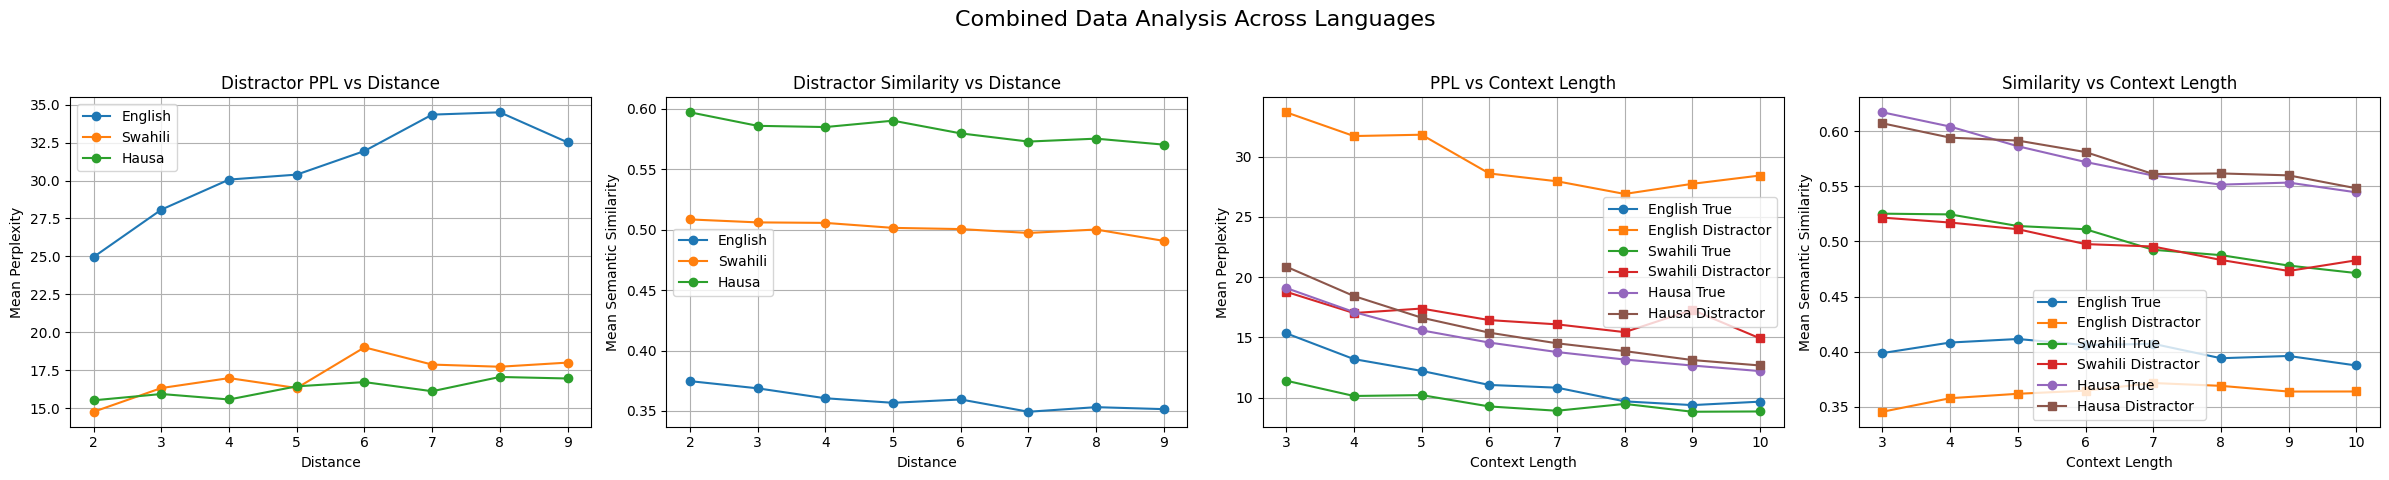

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Update these paths with the actual locations of your CSV files
paths = {
    'English': '/content/drive/MyDrive/research-results-language/nsp_questions_en_filtered.csv_with_features_ppl_mask_True_Mistral-7B-Instruct-v0.3.csv',
    'Swahili': '/content/drive/MyDrive/research-results-language/nsp_questions_sw.csv_with_features_ppl_mask_True_UlizaLlama3.csv',
    'Hausa': '/content/drive/MyDrive/research-results-language/nsp_questions_ha_filtered.csv_with_features_ppl_mask_False_HausaLlama.csv'
}

# Load and preprocess each dataset
dfs = []
for lang, path in paths.items():
    df = pd.read_csv(path)
    df['language'] = lang
    df['true_ppl'] = df.apply(lambda r: r['ppl_A'] if r['label'] == 'A' else r['ppl_B'], axis=1)
    df['distractor_ppl'] = df.apply(lambda r: r['ppl_B'] if r['label'] == 'A' else r['ppl_A'], axis=1)
    df['semantic_sim_distractor'] = df.apply(lambda r: r['semantic_sim_B'] if r['label'] == 'A' else r['semantic_sim_A'], axis=1)
    df['true_sim'] = df.apply(lambda r: r['semantic_sim_A'] if r['label'] == 'A' else r['semantic_sim_B'], axis=1)
    df['distractor_sim'] = df.apply(lambda r: r['semantic_sim_B'] if r['label'] == 'A' else r['semantic_sim_A'], axis=1)
    dfs.append(df)

# Combine into a single DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Create a 1x4 subplot layout
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Combined Data Analysis Across Languages', fontsize=16)

# 1) Distractor Option Perplexity vs Distance
ax = axes[0]
filtered_ppl = df_all[df_all['distractor_ppl'] < df_all['distractor_ppl'].quantile(0.99)]
for lang in paths:
    grp = (
        filtered_ppl[filtered_ppl['language'] == lang]
        .groupby('distractor_distance')['distractor_ppl']
        .mean()
    )
    ax.plot(grp.index, grp.values, marker='o', label=lang)
ax.set_title('Distractor PPL vs Distance')
ax.set_xlabel('Distance')
ax.set_ylabel('Mean Perplexity')
ax.grid(True)
ax.legend()

# 2) Distractor Option Similarity vs Distance
ax = axes[1]
for lang in paths:
    grp = (
        df_all[df_all['language'] == lang]
        .groupby('distractor_distance')['semantic_sim_distractor']
        .mean()
    )
    ax.plot(grp.index, grp.values, marker='o', label=lang)
ax.set_title('Distractor Similarity vs Distance')
ax.set_xlabel('Distance')
ax.set_ylabel('Mean Semantic Similarity')
ax.grid(True)
ax.legend()

# 3) Perplexity vs Context Length
ax = axes[2]
ppl_cutoff = max(df_all['true_ppl'].quantile(0.99), df_all['distractor_ppl'].quantile(0.99))
filtered_cp = df_all[
    (df_all['true_ppl'] < ppl_cutoff) & (df_all['distractor_ppl'] < ppl_cutoff)
]
for lang in paths:
    grp_true = (
        filtered_cp[filtered_cp['language'] == lang]
        .groupby('context_length')['true_ppl']
        .mean()
    )
    grp_dist = (
        filtered_cp[filtered_cp['language'] == lang]
        .groupby('context_length')['distractor_ppl']
        .mean()
    )
    ax.plot(grp_true.index, grp_true.values, marker='o', label=f'{lang} True')
    ax.plot(grp_dist.index, grp_dist.values, marker='s', label=f'{lang} Distractor')
ax.set_title('PPL vs Context Length')
ax.set_xlabel('Context Length')
ax.set_ylabel('Mean Perplexity')
ax.grid(True)
ax.legend()

# 4) Semantic Similarity vs Context Length
ax = axes[3]
sim_cutoff = max(df_all['true_sim'].quantile(0.99), df_all['distractor_sim'].quantile(0.99))
filtered_cs = df_all[
    (df_all['true_sim'] < sim_cutoff) & (df_all['distractor_sim'] < sim_cutoff)
]
for lang in paths:
    grp_true_sim = (
        filtered_cs[filtered_cs['language'] == lang]
        .groupby('context_length')['true_sim']
        .mean()
    )
    grp_dist_sim = (
        filtered_cs[filtered_cs['language'] == lang]
        .groupby('context_length')['distractor_sim']
        .mean()
    )
    ax.plot(grp_true_sim.index, grp_true_sim.values, marker='o', label=f'{lang} True')
    ax.plot(grp_dist_sim.index, grp_dist_sim.values, marker='s', label=f'{lang} Distractor')
ax.set_title('Similarity vs Context Length')
ax.set_xlabel('Context Length')
ax.set_ylabel('Mean Semantic Similarity')
ax.grid(True)
ax.legend()

# Final layout adjustments and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('combined_data_analysis_plot.png', dpi=300, bbox_inches='tight')
plt.show()